In [7]:
# 데이터 준비
from google.colab import files
uploaded = files.upload()

# colab > run_project 폴더에 있는 colab_train_test.zip 파일을 선택합니다.
my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip

Saving colab_train_test.zip to colab_train_test.zip
Archive:  colab_train_test.zip
   creating: test/ad/
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  inflating: test/ad/ad_test_3.jpg   
  inflating: test/ad/

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


30/30 [==============================] - 2s 42ms/step - loss: 0.7064 - accuracy: 0.4867 - val_loss: 0.6941 - val_accuracy: 0.4800
Epoch 2/50
30/30 [==============================] - 1s 38ms/step - loss: 0.6907 - accuracy: 0.5133 - val_loss: 0.6856 - val_accuracy: 0.7400
Epoch 3/50
30/30 [==============================] - 1s 35ms/step - loss: 0.6847 - accuracy: 0.5800 - val_loss: 0.6768 - val_accuracy: 0.5800
Epoch 4/50
30/30 [==============================] - 1s 38ms/step - loss: 0.6890 - accuracy: 0.5400 - val_loss: 0.6781 - val_accuracy: 0.5600
Epoch 5/50
30/30 [==============================] - 1s 35ms/step - loss: 0.6644 - accuracy: 0.6933 - val_loss: 0.6435 - val_accuracy: 0.5800
Epoch 6/50
30/30 [==============================] - 1s 38ms/step - loss: 0.6455 - accuracy: 0.6467 - val_loss: 0.6742 - val_accuracy: 0.4400
Epoch 7/50
30/30 [==============================] - 1s 39ms/step - loss: 0.6335 - accuracy: 0.7000 - val_loss: 0.5843 - val_accuracy: 0.7400
Epoch 8/50
30/30 [======

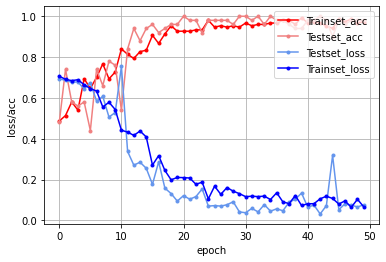

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,    # 수평 대칭 이미지를 50% 확률로 만들어 추가
                                   width_shift_range=0.1,   # 전체 크기의 10% 범위에서 좌우로 이동
                                   height_shift_range=0.1,  # 마찬가지로 위아래로 이동
                                                            # rotaion_range=5,
                                                            # shear_range=0.7,
                                                            # zoom_range=[0.9, 2.2],
                                                            # vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    './train',  # 학습셋이 있는 폴더 위치
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary')

# 테스트셋은 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './test', # 테스트셋이 있는 폴더 위치
    target_size=(150, 150),
    batch_size=5,
    class_mode='binary'
)


# CNN 모델을 만들어 적용하기
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 모델 실행
history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=50,
    validation_data=test_generator,
    validation_steps=10)

# 결과를 그래프로 표현하는 부분
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()